In [1]:
import optuna
import pulp as pl
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Optuna を用いた最適化

In [5]:
fruits_data = {
    'mango': {
        'cost': 129.168,
        'calories': 61,
        'protein': 0.5,
        'fat': 0,
        'carbs': 14.2,
        'fiber': 0.9,
        'salt': 0.0
    },
    'blueberries': {
        'cost': 200.16,
        'calories': 54.666666666666664,
        'protein': 0.5333333333333333,
        'fat': 0,
        'carbs': 12.0,
        'fiber': 2.3333333333333335,
        'salt': 0.0
    },
    'strawberries': {
        'cost': 185.76,
        'calories': 34,
        'protein': 0.9,
        'fat': 0.1,
        'carbs': 7.1,
        'fiber': 1.4,
        'salt': 0.0
    },
    'pineapple': {
        'cost': 142.56,
        'calories': 56.666666666666664,
        'protein': 0.6,
        'fat': 0,
        'carbs': 13.0,
        'fiber': 1.2,
        'salt': 0.0
    }
}


In [6]:
# 目的関数の定義
def objective(trial):
    # 各フルーツの重量を提案
    weights = {
        'mango': trial.suggest_int('mango', 0, 50),
        'blueberries': trial.suggest_int('blueberries', 0, 50),
        'strawberries': trial.suggest_int('strawberries', 0, 50),
        'pineapple': trial.suggest_int('pineapple', 0, 50)
    }
    
    # 合計コストとカロリーを計算
    total_cost = sum(weights[fruit] * fruits_data[fruit]['cost'] for fruit in weights) / 100
    total_calories = sum(weights[fruit] * fruits_data[fruit]['calories'] for fruit in weights) / 100
    
    return total_calories, -total_cost

In [7]:
# Optuna による多目的最適化
study = optuna.create_study(directions=['maximize', 'minimize'])
study.optimize(objective, n_trials=100)

[I 2024-04-27 12:27:57,202] A new study created in memory with name: no-name-7abee2bc-7733-4cb6-9d04-af564406b73c
[I 2024-04-27 12:27:57,207] Trial 0 finished with values: [66.19333333333333, -210.50784] and parameters: {'mango': 18, 'blueberries': 50, 'strawberries': 17, 'pineapple': 39}. 
[I 2024-04-27 12:27:57,209] Trial 1 finished with values: [32.56666666666666, -116.91071999999998] and parameters: {'mango': 4, 'blueberries': 35, 'strawberries': 14, 'pineapple': 11}. 
[I 2024-04-27 12:27:57,211] Trial 2 finished with values: [27.27, -110.32848] and parameters: {'mango': 1, 'blueberries': 27, 'strawberries': 25, 'pineapple': 6}. 
[I 2024-04-27 12:27:57,213] Trial 3 finished with values: [57.73, -146.61072] and parameters: {'mango': 49, 'blueberries': 2, 'strawberries': 12, 'pineapple': 40}. 
[I 2024-04-27 12:27:57,215] Trial 4 finished with values: [60.17666666666666, -178.77743999999998] and parameters: {'mango': 43, 'blueberries': 14, 'strawberries': 29, 'pineapple': 29}. 
[I 202

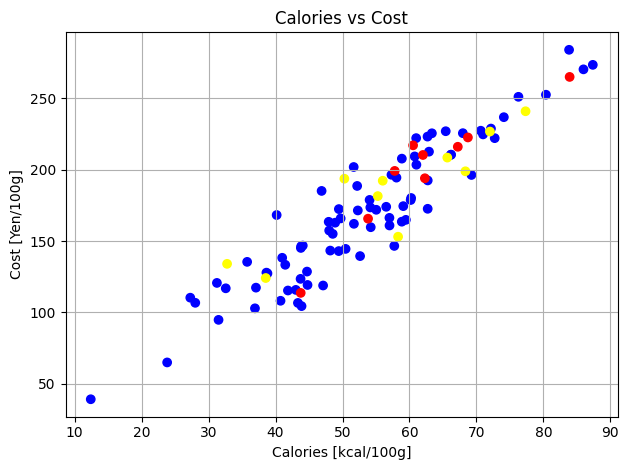

In [14]:
# パレートフロンティアの可視化部分を修正
calories = [trial.values[0] for trial in study.trials]  # 全試行のカロリー値
costs = [-trial.values[1] for trial in study.trials]  # 全試行のコスト値（符号反転）

colors = []
for i in range(len(study.trials)):
    if i <= 80:
        colors.append('blue')
    elif i <= 90:
        colors.append('yellow')
    else:
        colors.append('red')

# プロットの設定
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# サブプロット1: カロリーとコストの散布図
ax.scatter(calories, costs, c=colors)
ax.set_title('Calories vs Cost')
ax.set_xlabel('Calories [kcal/100g]')
ax.set_ylabel('Cost [Yen/100g]')
ax.grid(True)

plt.tight_layout()
plt.show()